In [158]:
import torch
import matplotlib.pyplot as plt

In [159]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [160]:
len(X),len(y)

(50, 50)

In [161]:
train_split = int((0.8 * len(X)))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] ,y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [162]:
def plot_predictions(
    train_features=X_train,train_label=y_train,test_features=X_test,test_label=y_test,predictions=None):

    plt.figure(figsize=(10,5))
    plt.scatter(train_features, train_label, s=10, color="red", label="Train set")

    plt.scatter(test_features, test_label, s=10, color="blue", label="Test set")

    if predictions is not None:
        plt.scatter(test_features,predictions,s=10,color="green",label="Predictions")

    plt.legend(prop={"size":14})

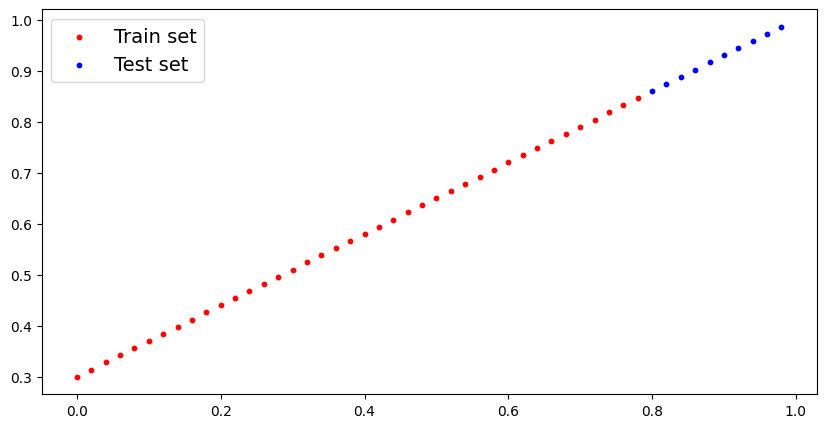

In [163]:
plot_predictions(X_train,y_train,X_test,y_test)

In [164]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self,x):
        return self.weights * x + self.bias

In [165]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

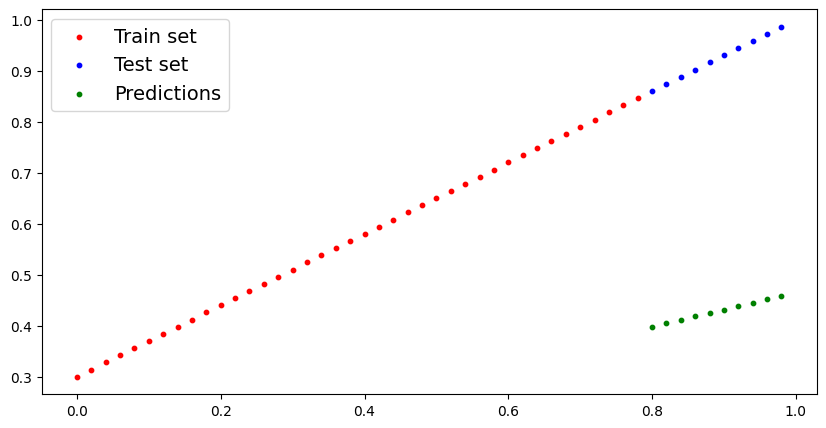

In [166]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    
plot_predictions(test_label=y_test,predictions=y_pred)

In [167]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.001)

In [168]:

epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(torch.tensor(X_train))
    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch},loss: {loss}")



Epoch: 0,loss: 0.31288138031959534
Epoch: 10,loss: 0.3013603389263153
Epoch: 20,loss: 0.28983938694000244
Epoch: 30,loss: 0.2783183455467224
Epoch: 40,loss: 0.26679736375808716
Epoch: 50,loss: 0.2552763819694519
Epoch: 60,loss: 0.24375538527965546
Epoch: 70,loss: 0.232234388589859
Epoch: 80,loss: 0.22071340680122375
Epoch: 90,loss: 0.2091923952102661


C:\Users\PREDATOR HELIOS\AppData\Local\Temp\ipykernel_281296\1457638269.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model_0(torch.tensor(X_train))
